In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "Mall_Customers.csv"  # Replace with the path to your dataset
data = pd.read_csv(file_path)

# Display initial rows for reference
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Cell 2: Perform basic statistical analysis
def statistical_analysis(data):
    """Perform basic statistical analysis and return summary statistics."""
    stats = data.describe()
    correlation_matrix = data.corr()
    return stats, correlation_matrix

stats, corr_matrix = statistical_analysis(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Display statistics
stats

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [3]:
# Cell 3: Display the correlation matrix
corr_matrix


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


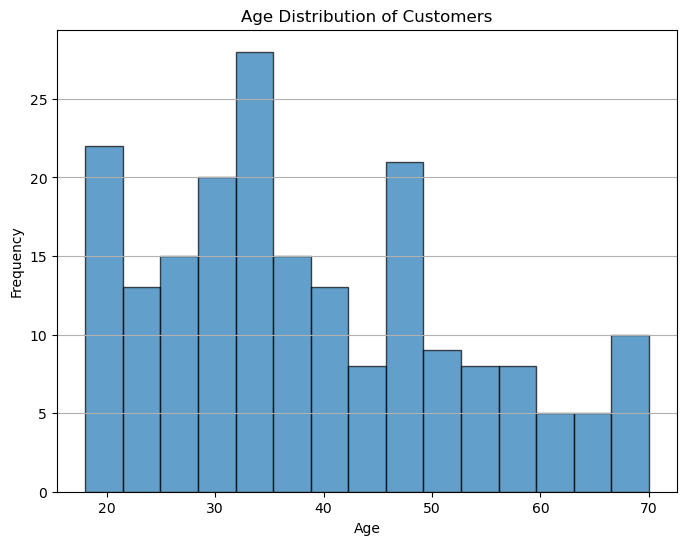

In [4]:
# Cell 4: Plot histogram for Age
def plot_age_histogram(data):
    """Plot histogram for the Age distribution."""
    plt.figure(figsize=(8, 6))
    plt.hist(data['Age'], bins=15, edgecolor='black', alpha=0.7)
    plt.title("Age Distribution of Customers")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.grid(axis='y')
    plt.show()

plot_age_histogram(data)


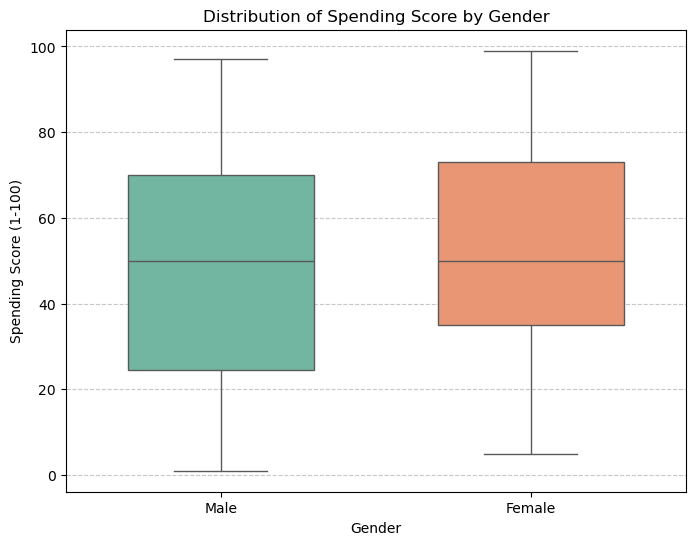

In [5]:
# Cell 5: Plot box plot for Spending Score by Gender
def plot_spending_score_boxplot(data):
    """
    Plot a box plot for Spending Score grouped by Gender.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, hue='Gender', dodge=False , palette='Set2', width=0.6)
    plt.title("Distribution of Spending Score by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Spending Score (1-100)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage
plot_spending_score_boxplot(data)

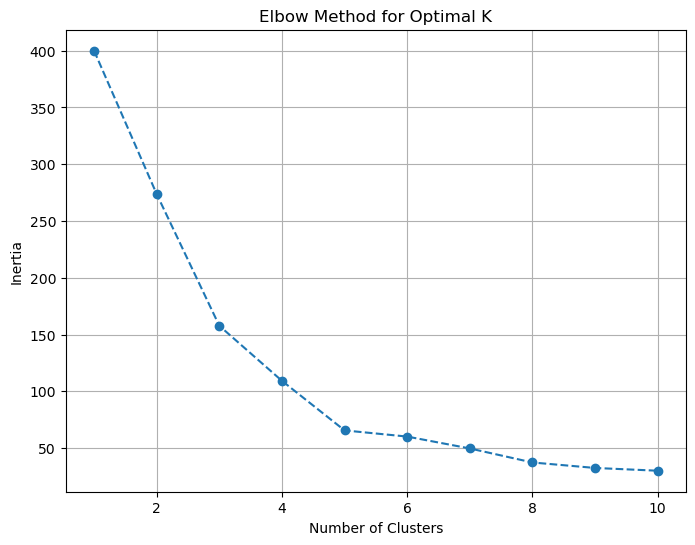

In [6]:
# Cell 6: Plot elbow curve
def plot_elbow(data):
    """Plot elbow curve to find the optimal number of clusters."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid()
    plt.show()

plot_elbow(data)


Silhouette Score for 3 clusters: 0.4666


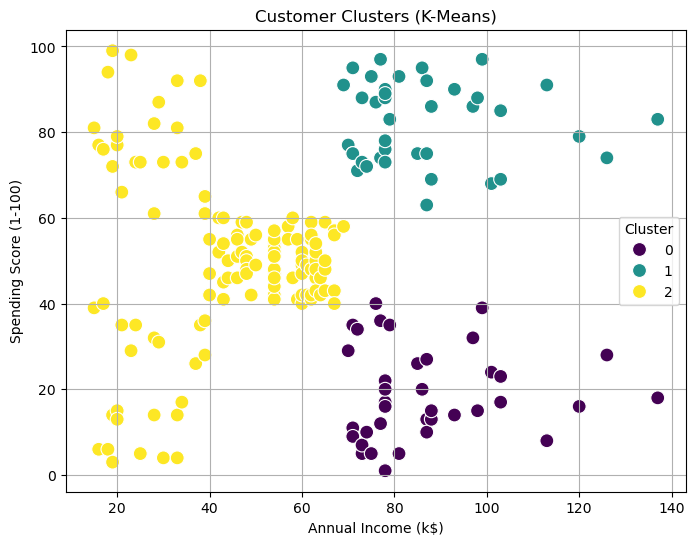

In [7]:
from sklearn.metrics import silhouette_score

# Cell 7: Perform K-Means clustering, plot scatter, and calculate silhouette score
def perform_kmeans_and_plot(data, n_clusters=3):
    """Perform K-Means clustering, plot scatter plot with clusters, and calculate silhouette score."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)
    
    # Calculate silhouette score
    score = silhouette_score(scaled_data, kmeans.labels_)
    print(f"Silhouette Score for {n_clusters} clusters: {score:.4f}")
    
    # Scatter plot with clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=data['Annual Income (k$)'],
        y=data['Spending Score (1-100)'],
        hue=data['Cluster'],
        palette='viridis',
        s=100
    )
    plt.title("Customer Clusters (K-Means)")
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()

perform_kmeans_and_plot(data, n_clusters=3)
